In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def print_spectra(name, xmax1=1000, xmin1=0, xmax2=1000, xmin2=0, window_length=11, polyorder=3):
    # Load data
    sample = pd.read_csv(f"C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/{name}.txt", 
                         sep="\t", skiprows=1)
    sample_tms = pd.read_csv(f"C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/{name}p.txt", 
                             sep="\t", skiprows=1)

    # Clean and convert the frequency column to numeric type
    f = pd.to_numeric(sample.iloc[:, 0].str.replace(',', '.'), errors='coerce')
    amplitude = pd.to_numeric(sample.iloc[:, 1].str.replace(',', '.'), errors='coerce')

    f_tms = pd.to_numeric(sample_tms.iloc[:, 0].str.replace(',', '.'), errors='coerce')
    amplitude_tms = pd.to_numeric(sample_tms.iloc[:, 1].str.replace(',', '.'), errors='coerce')

    # Drop any rows where conversion failed (if necessary)
    f = f.dropna()
    amplitude = amplitude[~np.isnan(f)]
    f = f[~np.isnan(f)]

    f_tms = f_tms.dropna()
    amplitude_tms = amplitude_tms[~np.isnan(f_tms)]
    f_tms = f_tms[~np.isnan(f_tms)]

    # Ensure the length of arrays are consistent after cleaning
    if len(amplitude) != len(f):
        raise ValueError("Mismatch in lengths of 'amplitude' and 'f' after cleaning")
    if len(amplitude_tms) != len(f_tms):
        raise ValueError("Mismatch in lengths of 'amplitude_tms' and 'f_tms' after cleaning")

    # Convert to numpy arrays to ensure proper alignment
    amplitude = np.asarray(amplitude)
    amplitude_tms = np.asarray(amplitude_tms)

    # Apply Savitzky-Golay filter to remove background noise
    amplitude_smoothed = savgol_filter(amplitude, window_length=window_length, polyorder=polyorder)
    amplitude_tms_smoothed = savgol_filter(amplitude_tms, window_length=window_length, polyorder=polyorder)

    # Plot signals
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(f, amplitude_smoothed, label="{}".format(name))
    plt.xlabel(r"Frequency $f$ [Hz]")
    plt.xlim(xmin1, xmax1)
    plt.ylabel("Amplitude [u.a]")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(f_tms, amplitude_tms_smoothed, label="{} + TMS ".format(name))
    plt.xlabel(r"Frequency $f$ [Hz]")
    plt.xlim(xmin2, xmax2)
    plt.ylabel("Amplitude [u.a]")
    plt.legend()

    plt.suptitle('Frequency spectrum of probe {} '.format(name), fontsize=16)

    plt.tight_layout()
    plt.show()


In [138]:
print_spectra("A")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/A.txt'

In [112]:
print_spectra("B")

IndexError: single positional indexer is out-of-bounds

499
499


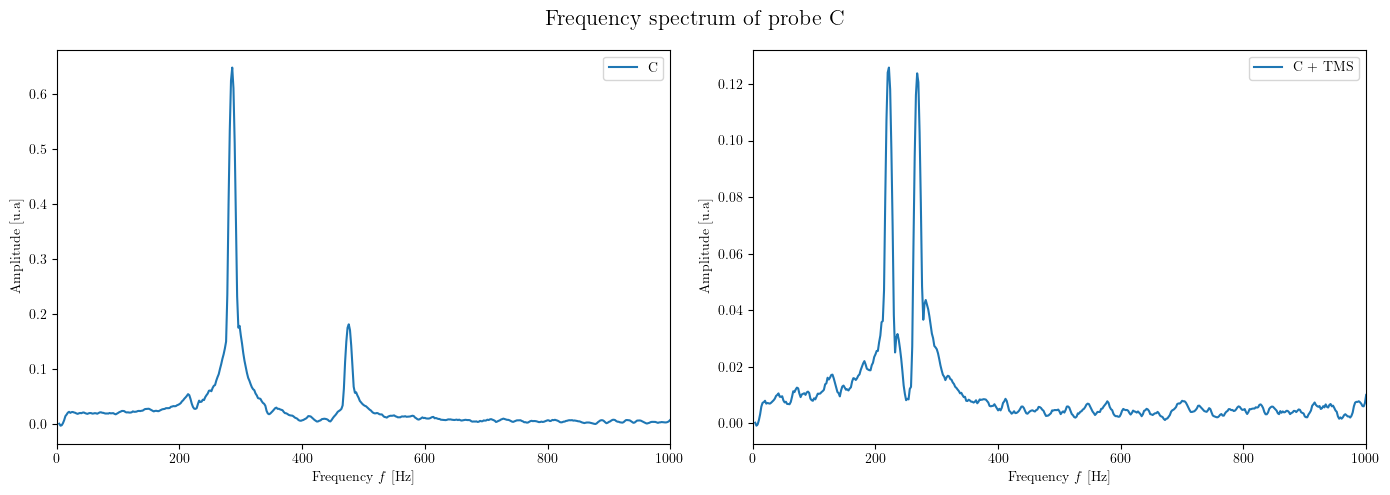

In [136]:
print_spectra("C")

In [1]:
print_spectra("D", 600,300,600,280)

NameError: name 'print_spectra' is not defined

499
499


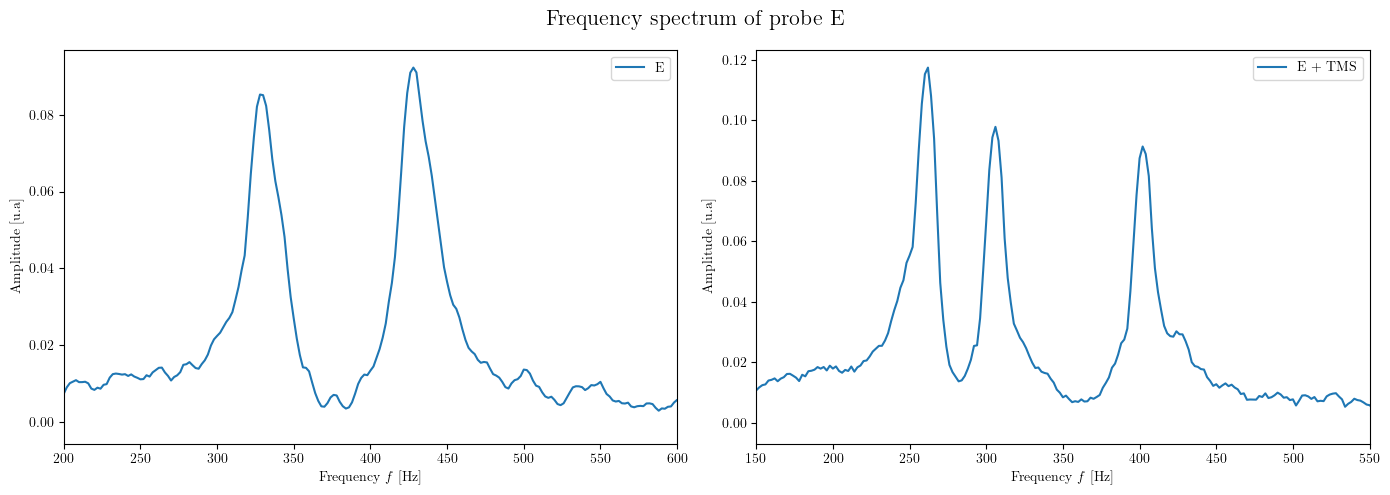

In [139]:
print_spectra("E", 600,200,550,150)

In [2]:
%matplotlib inline
names = np.array(["1"])#, "C", "D", "E"])
def print_profil(name):
    
    sample = pd.read_csv("C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/III/testProfil{}.txt".format(name),
                     sep = "\t", skiprows = 1)
    amplitude = sample.iloc[:, 1].values
    y = sample.iloc[:,0].values
    plt.plot(y, amplitude, label = r"Measurement Nr. {}".format(name), linewidth = 0.7)
    plt.title("Time evolution of system")
    plt.xlabel("vert. coord. [mm]")
    plt.xlim(-8,18)
    plt.ylim(0,125)
    plt.ylabel("Amplituded")
    plt.legend()

NameError: name 'np' is not defined

In [ ]:
times = np.array(["1", "10", "30", "50",  "96"])
for t in times:
    print_profil(t)

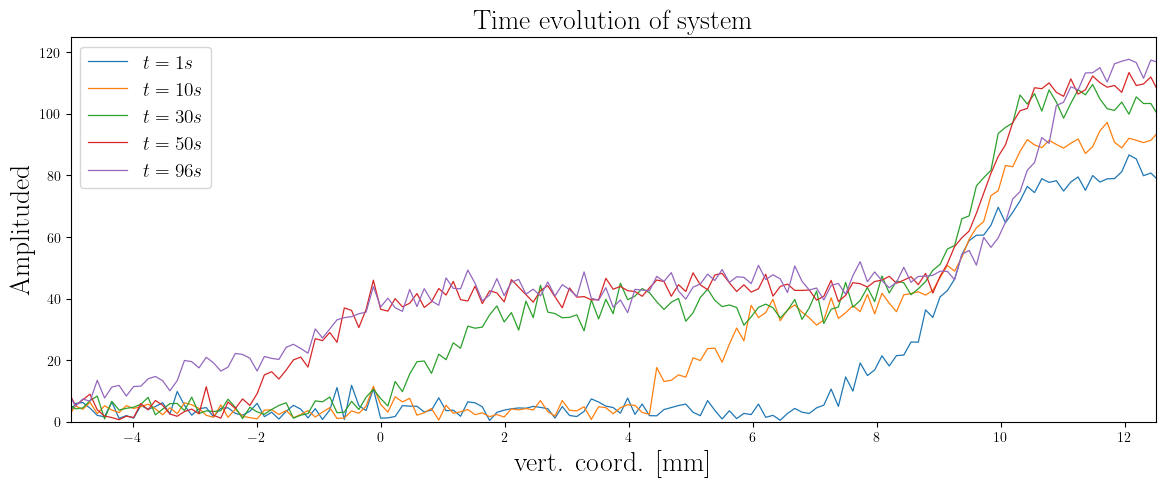

In [5]:
times = np.array(["1", "10", "30", "50",  "96"])
plt.figure(figsize = (14,5))
for t in times:
    sample = pd.read_csv("C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/III/testProfil{}.txt".format(t),
                     sep = "\t", skiprows = 1)
    amplitude = sample.iloc[:, 1].values
    y = sample.iloc[:,0].values
    plt.plot(y, amplitude, label = r"$t = {} s$".format(t), linewidth = 0.9)
    
plt.title("Time evolution of system", fontsize = 20)
plt.xlabel("vert. coord. [mm]", fontsize = 20)
plt.xlim(-5,12.5)
plt.ylim(0,125)
plt.ylabel("Amplituded", fontsize = 20)
plt.legend(fontsize = 14)
#plt.savefig("t_ev_-4-11.png")

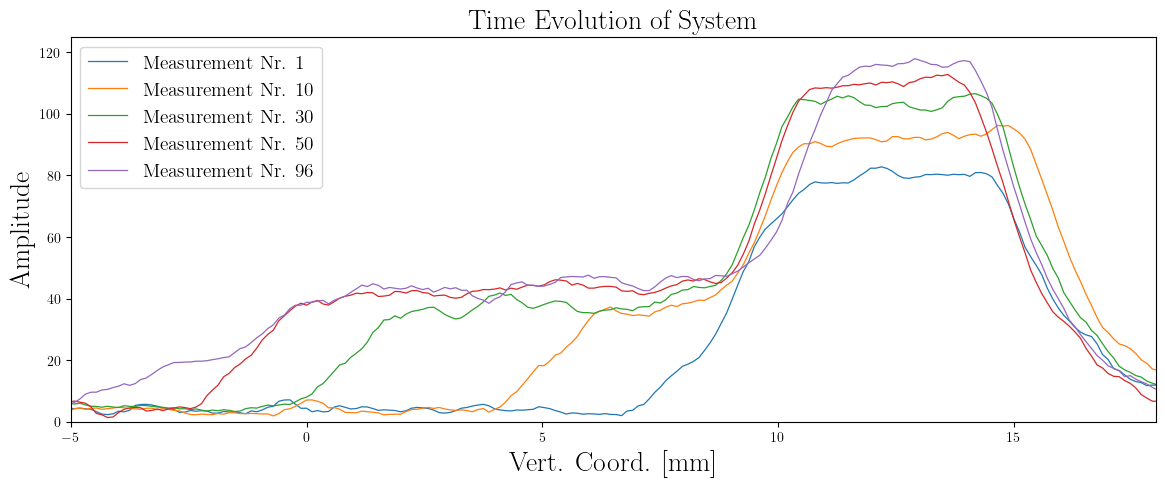

In [9]:
from scipy.signal import savgol_filter

times = np.array(["1", "10", "30", "50",  "96"])
plt.figure(figsize=(14, 5))

for t in times:
    sample = pd.read_csv("C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/III/testProfil{}.txt".format(t),
                         sep="\t", skiprows=1)
    amplitude = sample.iloc[:, 1].values
    y = sample.iloc[:, 0].values
    
    # Apply the Savitzky-Golay filter
    amplitude_smoothed = savgol_filter(amplitude, window_length=11, polyorder=3)
    
    plt.plot(y, amplitude_smoothed, label=r"Measurement Nr. {}".format(t), linewidth=0.9)

plt.title("Time Evolution of System", fontsize=20)
plt.xlabel("Vert. Coord. [mm]", fontsize=20)
plt.xlim(-5, 18)
plt.ylim(0, 125)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("time_evolution.jpg")

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def print_spectra(name, xmax1=1000, xmin1=0, xmax2=1000, xmin2=0, window_length=10, polyorder=3):
    # Load data
    sample = pd.read_csv(f"C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/{name}.txt", 
                         sep="\t", skiprows=1)
    sample_tms = pd.read_csv(f"C:/Users/notchok/Documents/5. Semester/FP/FP/F61/Protocol images/{name}p.txt", 
                             sep="\t", skiprows=1)

    # Clean and convert the frequency column to numeric type
    f = pd.to_numeric(sample.iloc[:, 0].str.replace(',', '.'), errors='coerce')
    amplitude = pd.to_numeric(sample.iloc[:, 1].str.replace(',', '.'), errors='coerce')

    f_tms = pd.to_numeric(sample_tms.iloc[:, 0].str.replace(',', '.'), errors='coerce')
    amplitude_tms = pd.to_numeric(sample_tms.iloc[:, 1].str.replace(',', '.'), errors='coerce')

    # Drop any rows where conversion failed (if necessary)
    f = f.dropna()
    amplitude = amplitude.dropna()
    print(len(f))
    f_tms = f_tms.dropna()
    print(len(f_tms))
    amplitude_tms = amplitude_tms.dropna()

    # Apply Savitzky-Golay filter to remove background noise
    amplitude_smoothed = savgol_filter(amplitude, window_length=window_length, polyorder=polyorder)
    amplitude_tms_smoothed = savgol_filter(amplitude_tms, window_length=window_length, polyorder=polyorder)

    # Plot signals
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(f, amplitude_smoothed, label="{}".format(name))
    plt.xlabel(r"Frequency $f$ [Hz]")
    plt.xlim(xmin1, xmax1)
    plt.ylabel("Amplitude [u.a]")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(f_tms, amplitude_tms_smoothed, label="{} + TMS ".format(name))
    plt.xlabel(r"Frequency $f$ [Hz]")
    plt.xlim(xmin2, xmax2)
    plt.ylabel("Amplitude [u.a]")
    plt.legend()

    plt.suptitle('Frequency spectrum of probe {} '.format(name), fontsize=16)

    plt.tight_layout()
    plt.show()


In [135]:
print_spectra("A")

3
499


ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.